In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key
from config import gkey

In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)
#coordinates

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [5]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities=[]

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 71.15,
  'feels_like': 68.05,
  'temp_min': 68,
  'temp_max': 73,
  'pressure': 1014,
  'humidity': 56},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 170},
 'clouds': {'all': 75},
 'dt': 1593147187,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1593162545,
  'sunset': 1593217507},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data=city_weather.json()

In [11]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1593162545,
 'sunset': 1593217507}

In [12]:
boston_data["sys"]["country"]

'US'

In [13]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 73 56 75 8.05


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 26, 4, 53, 7)

In [15]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-26 04:53:07'

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        
    # Create emdpoint URL with each city.
    city_url=url+"&q="+city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City '{city}' not found. Skipping...")
        pass
        #raise

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | kita
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | karlovac
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | ruatoria
City 'ruatoria' not found. Skipping...
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | port hedland
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | gondanglegi
Processing Record 2

Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | berezovyy
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | vaitupu
City 'vaitupu' not found. Skipping...
Processing Record 45 of Set 4 | lodja
Processing Record 46 of Set 4 | jonkoping
Processing Record 47 of Set 4 | naugarzan
City 'naugarzan' not found. Skipping...
Processing Record 48 of Set 4 | nizhneyansk
City 'nizhneyansk' not found. Skipping...
Processing Record 49 of Set 4 | benoy
Processing Record 50 of Set 4 | lakatoro
Processing Record 1 of Set 5 | paragominas
Processing Record 2 of Set 5 | sentyabrskiy
City 'sentyabrskiy' not found. Skipping...
Processing Record 3 of Set 5 | gat
Processing Record 4 of Set 5 | varhaug
Processing Record 5 of Set 5 | assiniboia
Processing Record 6 of Set 5 | trinidad
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | wilmington
Processing Record 9 of Set 5 | jumla
Processing Record 10 o

Processing Record 22 of Set 8 | dingle
Processing Record 23 of Set 8 | evensk
Processing Record 24 of Set 8 | camacupa
Processing Record 25 of Set 8 | namibe
Processing Record 26 of Set 8 | abu dhabi
Processing Record 27 of Set 8 | urusha
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | ribas do rio pardo
Processing Record 30 of Set 8 | hillsborough
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | shakiso
Processing Record 35 of Set 8 | riyadh
Processing Record 36 of Set 8 | garmsar
Processing Record 37 of Set 8 | biltine
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | conceicao da barra
Processing Record 40 of Set 8 | rock sound
Processing Record 41 of Set 8 | jensen beach
Processing Record 42 of Set 8 | menomonie
Processing Record 43 of Set 8 | husavik
Processing Record 44 of Set 8 | machico
Processing Record 45 o

Processing Record 10 of Set 12 | sirumugai
Processing Record 11 of Set 12 | nguiu
City 'nguiu' not found. Skipping...
Processing Record 12 of Set 12 | nelson bay
Processing Record 13 of Set 12 | houma
Processing Record 14 of Set 12 | karaul
City 'karaul' not found. Skipping...
Processing Record 15 of Set 12 | bolshaya murta
City 'bolshaya murta' not found. Skipping...
Processing Record 16 of Set 12 | kjollefjord
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | green valley
Processing Record 19 of Set 12 | aflu
City 'aflu' not found. Skipping...
Processing Record 20 of Set 12 | santa lucia
Processing Record 21 of Set 12 | ondorhaan
City 'ondorhaan' not found. Skipping...
Processing Record 22 of Set 12 | naduvattam
Processing Record 23 of Set 12 | hualmay
Processing Record 24 of Set 12 | verkhnevilyuysk
Processing Record 25 of Set 12 | bo rai
Processing Record 26 of Set 12 | dipkarpaz
City 'dipkarpaz' not found. Skipping...
Processing Record 27 of Set 12 | noume

In [18]:
len(city_data)

563

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,36.28,91,1,6.38,GL,2020-06-26 04:43:07
1,Kita,13.03,-9.49,76.01,79,42,3.38,ML,2020-06-26 04:53:07
2,Cherskiy,68.75,161.30,44.58,60,17,26.06,RU,2020-06-26 04:43:08
3,Chuy,-33.70,-53.46,43.61,80,0,9.69,UY,2020-06-26 04:51:04
4,Luderitz,-26.65,15.16,55.40,93,67,3.36,NA,2020-06-26 04:43:14
5,Atuona,-9.80,-139.03,79.77,79,39,16.73,PF,2020-06-26 04:51:18
6,Karlovac,45.49,15.55,62.01,94,62,1.54,HR,2020-06-26 04:53:07
7,Hithadhoo,-0.60,73.08,84.72,71,68,8.41,MV,2020-06-26 04:53:07
8,Busselton,-33.65,115.33,60.01,70,9,20.98,AU,2020-06-26 04:50:01
9,Arraial Do Cabo,-22.97,-42.03,71.76,78,69,12.30,BR,2020-06-26 04:39:40


In [20]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2020-06-26 04:43:07,72.79,-56.15,36.28,91,1,6.38
1,Kita,ML,2020-06-26 04:53:07,13.03,-9.49,76.01,79,42,3.38
2,Cherskiy,RU,2020-06-26 04:43:08,68.75,161.30,44.58,60,17,26.06
3,Chuy,UY,2020-06-26 04:51:04,-33.70,-53.46,43.61,80,0,9.69
4,Luderitz,NA,2020-06-26 04:43:14,-26.65,15.16,55.40,93,67,3.36
5,Atuona,PF,2020-06-26 04:51:18,-9.80,-139.03,79.77,79,39,16.73
6,Karlovac,HR,2020-06-26 04:53:07,45.49,15.55,62.01,94,62,1.54
7,Hithadhoo,MV,2020-06-26 04:53:07,-0.60,73.08,84.72,71,68,8.41
8,Busselton,AU,2020-06-26 04:50:01,-33.65,115.33,60.01,70,9,20.98
9,Arraial Do Cabo,BR,2020-06-26 04:39:40,-22.97,-42.03,71.76,78,69,12.30


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593147227.618519

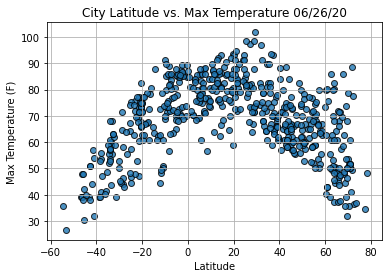

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

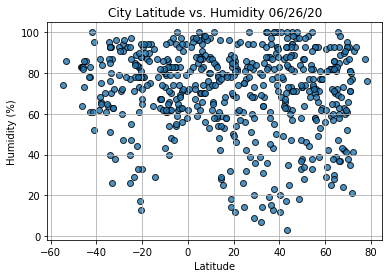

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

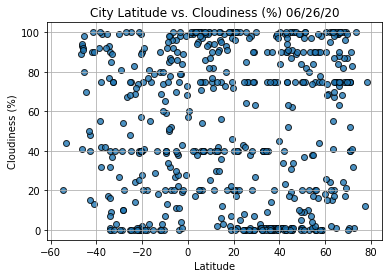

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

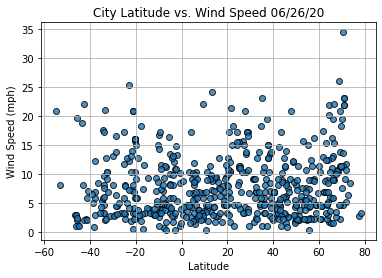

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Calculate the regression line "y values" from the slope and intercept.
(slope,intercept,r_value,p_value,std_err)=linregress(lats, max_temps)
regress_values = [(lat * slope + intercept) for lat in lats]


In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The R-value is: {r_value:.3f}")

In [31]:
index13=city_data_df.loc[13]
index13

City                       Faanui
Country                        PF
Date          2020-06-26 04:53:07
Lat                        -16.48
Lng                       -151.75
Max Temp                    78.46
Humidity                       75
Cloudiness                     55
Wind Speed                   11.5
Name: 13, dtype: object

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

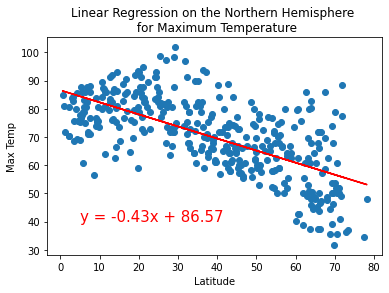

The R-value is: -0.656


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
    y_label='Max Temp',
    text_coordinates=(5,40))



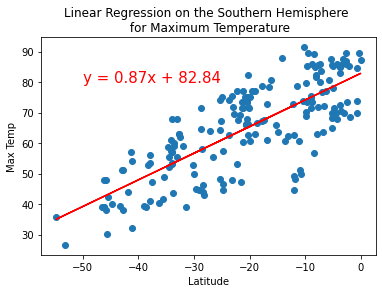

The R-value is: 0.781


In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
    y_label='Max Temp',
    text_coordinates=(-50,80))




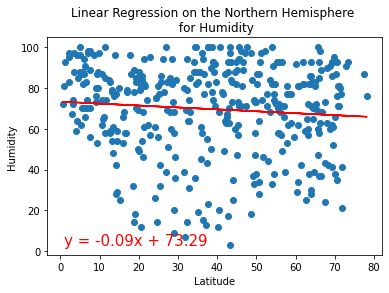

The R-value is: -0.089


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Humidity', 
    y_label='Humidity',
    text_coordinates=(1,3))




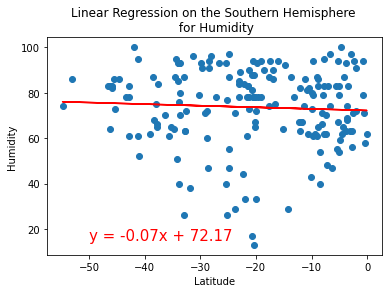

The R-value is: -0.054


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Humidity', 
    y_label='Humidity',
    text_coordinates=(-50,15))


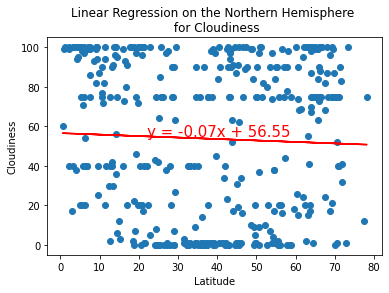

The R-value is: -0.040


In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Cloudiness', 
    y_label='Cloudiness',
    text_coordinates=(22,55))



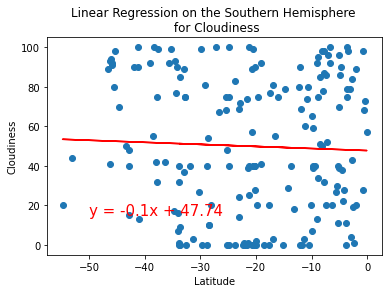

The R-value is: -0.041


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Cloudiness', 
    y_label='Cloudiness',
    text_coordinates=(-50,15))



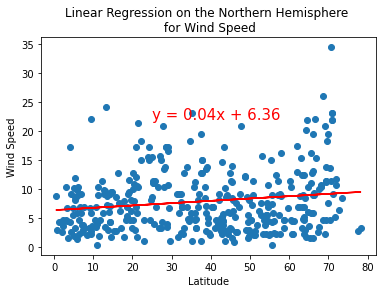

The R-value is: 0.158


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Wind Speed', 
    y_label='Wind Speed',
    text_coordinates=(25,22))

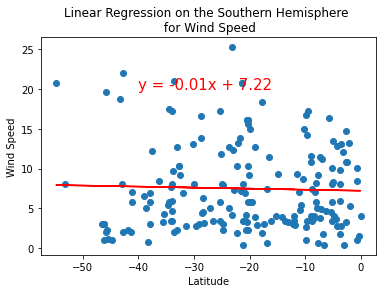

The R-value is: -0.033


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Wind Speed', 
    y_label='Wind Speed',
    text_coordinates=(-40,20))

In [41]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Upernavik,GL,2020-06-26 04:43:07,72.79,-56.15,36.28,91,1,6.38
1,1,Kita,ML,2020-06-26 04:53:07,13.03,-9.49,76.01,79,42,3.38
2,2,Cherskiy,RU,2020-06-26 04:43:08,68.75,161.30,44.58,60,17,26.06
3,3,Chuy,UY,2020-06-26 04:51:04,-33.70,-53.46,43.61,80,0,9.69
4,4,Luderitz,NaN,2020-06-26 04:43:14,-26.65,15.16,55.40,93,67,3.36


In [42]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [43]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [44]:
# Heatmap of temperature
# 1. Assign the locations to an array of latitude and longitude pairs.
# Get the latitude and longitude.
locations = city_data_df[["Lat","Lng"]]

# 2. Assign the weights variable to some values. 
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)

# 5. Add the heatmap layer.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
fig.add_layer(heat_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Heatmap of wind speed:

In [48]:
locations = city_data_df[["Lat", "Lng"]]
winds = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=winds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 65
What is the maximum temperature you would like for your trip? 75


In [50]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df=city_data_df.loc[(city_data_df["Max Temp"]<= max_temp) & ((city_data_df["Max Temp"]>= min_temp))]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
9,9,Arraial Do Cabo,BR,2020-06-26 04:39:40,-22.97,-42.03,71.76,78,69,12.30
26,26,Taonan,CN,2020-06-26 04:53:08,45.33,122.78,72.77,57,91,11.21
29,29,Los Llanos De Aridane,ES,2020-06-26 04:43:26,28.66,-17.92,71.60,73,75,17.22
30,30,Jalpan,MX,2020-06-26 04:53:09,21.23,-99.48,71.78,82,100,1.74
31,31,Avarua,CK,2020-06-26 04:51:15,-21.21,-159.78,71.60,73,25,3.36
34,34,Sao Filipe,CV,2020-06-26 04:43:09,14.90,-24.50,73.67,80,12,9.55
41,41,Beloha,MG,2020-06-26 04:53:09,-25.17,45.05,67.26,77,48,11.79
42,42,Airai,TL,2020-06-26 04:43:11,-8.93,125.41,71.42,61,13,4.00
51,51,Zaymishche,RU,2020-06-26 04:53:10,52.73,32.23,68.94,77,0,5.46
58,58,Asau,RO,2020-06-26 04:43:16,46.43,26.40,66.00,81,16,2.66


In [51]:
preferred_cities_df.count()

City_ID       147
City          147
Country       147
Date          147
Lat           147
Lng           147
Max Temp      147
Humidity      147
Cloudiness    147
Wind Speed    147
dtype: int64

In [52]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
9,Arraial Do Cabo,BR,71.76,-22.97,-42.03,
26,Taonan,CN,72.77,45.33,122.78,
29,Los Llanos De Aridane,ES,71.60,28.66,-17.92,
30,Jalpan,MX,71.78,21.23,-99.48,
31,Avarua,CK,71.60,-21.21,-159.78,
34,Sao Filipe,CV,73.67,14.90,-24.50,
41,Beloha,MG,67.26,-25.17,45.05,
42,Airai,TL,71.42,-8.93,125.41,
51,Zaymishche,RU,68.94,52.73,32.23,
58,Asau,RO,66.00,46.43,26.40,


In [53]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": gkey,
    "location": ["Lat", "Lng"]}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

In [54]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [55]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
9,Arraial Do Cabo,BR,71.76,-22.97,-42.03,Pousada Porto Praia
26,Taonan,CN,72.77,45.33,122.78,Makro Hotel
29,Los Llanos De Aridane,ES,71.60,28.66,-17.92,Valle Aridane
30,Jalpan,MX,71.78,21.23,-99.48,Hotel Mision Jalpan
31,Avarua,CK,71.60,-21.21,-159.78,Paradise Inn
34,Sao Filipe,CV,73.67,14.90,-24.50,Tortuga B&B
41,Beloha,MG,67.26,-25.17,45.05,
42,Airai,TL,71.42,-8.93,125.41,Juvinal Martin
51,Zaymishche,RU,68.94,52.73,32.23,Koltso Hotel
58,Asau,RO,66.00,46.43,26.40,Casa Mika Ciobanus


In [56]:
# Add a pop-up marker for each city that displays the hotel name, city name, country, and maximum temperature.
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [57]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [58]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))